In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# 1. Load Dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 2. Preprocessing & Split
# Scaling is crucial for models like SVM and Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [3]:
# Define models to compare
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True)
}

results = []

# 3. Train and Predict
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Calculate Metrics
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, predictions),
        "Precision": precision_score(y_test, predictions),
        "Recall": recall_score(y_test, predictions),
        "F1-Score": f1_score(y_test, predictions),
        "Train Score": model.score(X_train, y_train),
        "Test Score": model.score(X_test, y_test)
    })

# 4. Create Comparison Table
comparison_df = pd.DataFrame(results)
print(comparison_df)

                 Model  Accuracy  Precision    Recall  F1-Score  Train Score  \
0  Logistic Regression  0.973684   0.972222  0.985915  0.979021     0.986813   
1        Decision Tree  0.947368   0.957746  0.957746  0.957746     1.000000   
2        Random Forest  0.964912   0.958904  0.985915  0.972222     1.000000   
3                  SVM  0.973684   0.972222  0.985915  0.979021     0.986813   

   Test Score  
0    0.973684  
1    0.947368  
2    0.964912  
3    0.973684  


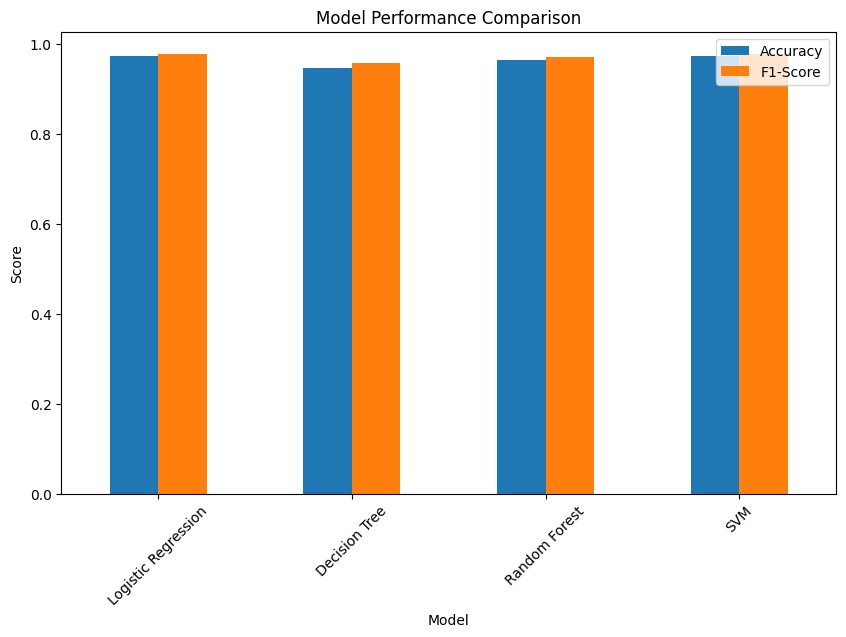

Best Model Selected: Logistic Regression


['best_model.pkl']

In [4]:
# 5. Plot Comparison Bar Chart
comparison_df.set_index('Model')[['Accuracy', 'F1-Score']].plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

# 6. Select and Save Best Model
# Example logic: Select the model with the highest F1-Score
best_model_name = comparison_df.iloc[comparison_df['F1-Score'].idxmax()]['Model']
best_model = models[best_model_name]

print(f"Best Model Selected: {best_model_name}")
joblib.dump(best_model, 'best_model.pkl')